In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd

In [ ]:
!ls '/content/drive/My Drive/Colab Notebooks/BTC_Analysis'

bitstampUSD_1-min_data_2012-01-01_to_2020-12-31.csv
BTC_analysis_2012-2021.ipynb


In [ ]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/BTC_Analysis/bitstampUSD_1-min_data_2012-01-01_to_2020-12-31.csv')

In [ ]:
data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.describe()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,4.727777e+06,3.484305e+06,3.484305e+06,3.484305e+06,3.484305e+06,3.484305e+06,3.484305e+06,3.484305e+06
mean,1.467409e+09,4.570658e+03,4.573721e+03,4.567413e+03,4.570624e+03,9.422676e+00,3.315691e+04,4.570625e+03
std,8.203749e+07,4.775105e+03,4.778620e+03,4.771352e+03,4.775094e+03,3.101255e+01,1.129107e+05,4.775090e+03
min,1.325318e+09,3.800000e+00,3.800000e+00,1.500000e+00,1.500000e+00,0.000000e+00,0.000000e+00,3.800000e+00
25%,1.396235e+09,4.321900e+02,4.324300e+02,4.320000e+02,4.322000e+02,3.917811e-01,4.147936e+02,4.321753e+02
50%,1.467540e+09,3.085010e+03,3.093250e+03,3.078010e+03,3.084410e+03,1.936719e+00,3.305199e+03,3.085478e+03
75%,1.538456e+09,8.158010e+03,8.162850e+03,8.152790e+03,8.157310e+03,7.299825e+00,2.158297e+04,8.157964e+03
max,1.609373e+09,2.899738e+04,2.901032e+04,2.896366e+04,2.899738e+04,5.853852e+03,1.044599e+07,2.898589e+04


In [ ]:
data.shape

(4727777, 8)

In [ ]:
from datetime import datetime

In [ ]:
data['Datetime']=pd.to_datetime(data['Timestamp'],unit='s')

In [ ]:
data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Datetime
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011-12-31 07:52:00
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:53:00
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:54:00
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:55:00
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:56:00


In [ ]:
data['Year']=pd.DatetimeIndex(data['Datetime']).year

In [ ]:
data['Month']=pd.DatetimeIndex(data['Datetime']).month

In [ ]:
data['Day']=pd.DatetimeIndex(data['Datetime']).day

In [ ]:
data['Hour']=pd.DatetimeIndex(data['Datetime']).hour

In [ ]:
data['Mins']=pd.DatetimeIndex(data['Datetime']).minute

In [ ]:
data.dropna(axis=0, inplace=True) # попробовать метод ffil

In [ ]:
data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Datetime,Year,Month,Day,Hour,Mins
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,2011-12-31 07:52:00,2011,12,31,7,52
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000,2011-12-31 15:50:00,2011,12,31,15,50
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411,2011-12-31 16:59:00,2011,12,31,16,59
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000,2011-12-31 17:00:00,2011,12,31,17,0
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000,2012-01-01 04:16:00,2012,1,1,4,16


In [ ]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


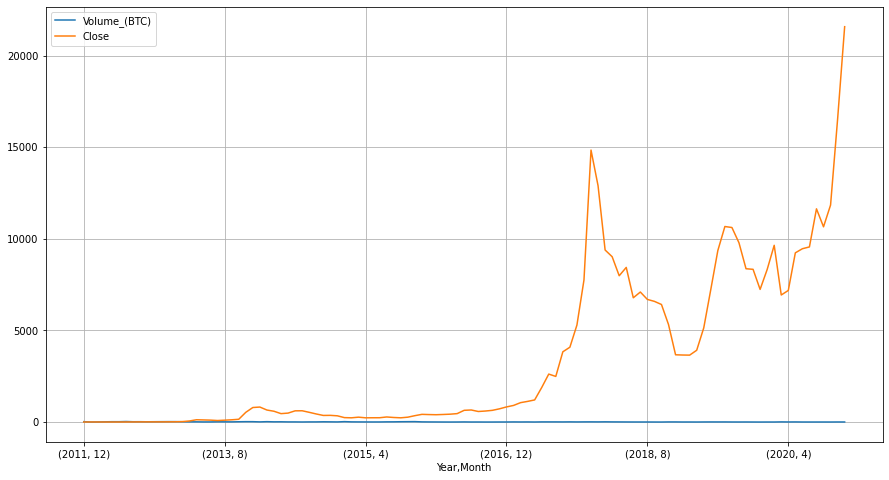

In [ ]:
data.groupby(['Year','Month'])['Volume_(BTC)','Close'].mean().plot(figsize=(15,8), grid=True)
plt.show()

In [ ]:
t=data[data['Year']==2019].copy()

In [ ]:
t.index = t.Month

In [ ]:
#t=t.drop(columns=['Year','Timestamp'], axis=1)

In [ ]:
t.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Datetime,Year,Month
Month,,,,,,,,,,,
1,1546300800,3693.85,3698.79,3693.85,3698.00,5.491289,20301.156505,3696.974936,2019-01-01 00:00:00,2019,1
1,1546300860,3694.72,3694.72,3690.65,3690.65,9.500151,35080.265871,3692.600865,2019-01-01 00:01:00,2019,1
1,1546300920,3689.73,3689.73,3686.62,3686.62,0.965966,3562.371230,3687.884698,2019-01-01 00:02:00,2019,1
1,1546300980,3692.85,3692.85,3688.32,3692.35,0.296662,1095.220713,3691.813285,2019-01-01 00:03:00,2019,1
1,1546301040,3692.35,3692.35,3690.34,3690.34,0.111622,412.065433,3691.614849,2019-01-01 00:04:00,2019,1


In [ ]:
t.columns

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume_(BTC)',
       'Volume_(Currency)', 'Weighted_Price', 'Datetime', 'Year', 'Month'],
      dtype='object')

In [ ]:
col=['Volume_(Currency)',
       'Weighted_Price','Month']

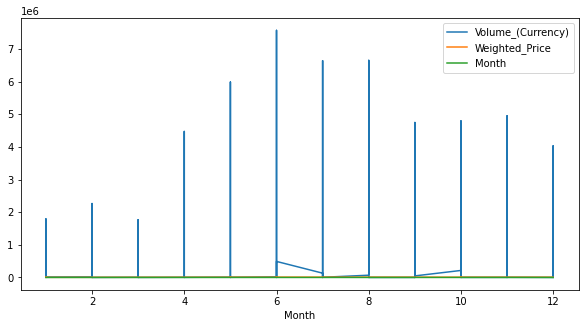

In [ ]:
t[col].plot(figsize=(10,5))
plt.show()